# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

- How do you define the most profitable item? Why? Explain your thinking.

ANSWER:
I think the most profitable item should be defined by its sales, so we can see which bottle is bringing in the most money. Bottles sold can show how popular a bottle is, but it doesn't take into account how much money it's actually bringing in. 

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/iowa.csv')

<Axes: xlabel='Sale (Dollars)', ylabel='Item Description'>

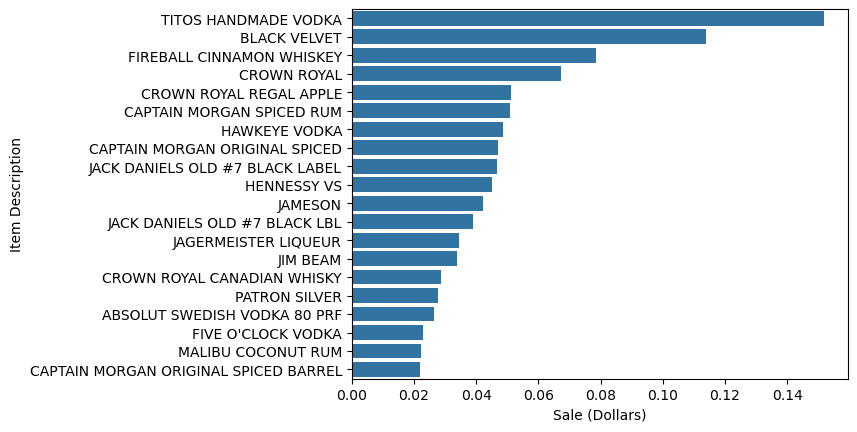

In [70]:
# Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.

sales = (df.loc[:,['Sale (Dollars)','Item Description']]
         .groupby('Item Description')
         .sum()
         .sort_values(by='Sale (Dollars)',ascending=False) )

top_sales = sales[:20]

#Make a plot of the top liquors.
sns.barplot(top_sales['Sale (Dollars)']/np.sum(top_sales['Sale (Dollars)']), orient = 'h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [ ]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

# subtracting vectors x and y
results = x - y


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?

ANSWER:
If  we try to subract x and y as they are we get a ValueError, because the arrays are not the same shape - x is a 1 by 3 and y is a 1 by 2.

In [ ]:
#Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.

sub = x.reshape(1,-1) - y.reshape(-1,1)
print(sub)

[[-1  1  3]
 [-4 -2  0]]


In [17]:
## Write two double for-loops to replicate the results of previous two answers.

x = [1,3,5]
y = [2,5]

results = []

for i in range(len(y)):
    row = [] #creates a new row for every element in y
    for j in range (len(x)):
        row.append(x[j] - y[i]) #subtracts current x to current y, adds to row
    results.append(row) #adds to results list
    #inner loop repeats until there's no more elements in x, then goes back to outer loop
 
print(results)

[[-1, 1, 3], [-4, -2, 0]]


- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

ANSWER:
x.reshape(1,-1) - makes the array 1 row and then adds the # of columns depending on the number of elements

x.reshape(-1,1) - make the array 1 column and then adds the # of rows depending on the number of elements

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

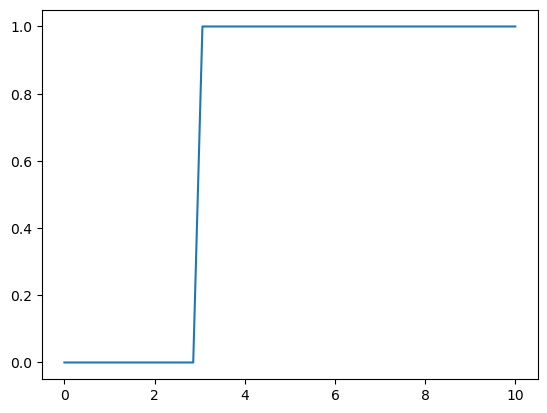

In [55]:
# For x = 3, plot the indicator for any z

import matplotlib.pyplot as plt

x = [3]

grid = np.linspace(0, 10) # Create a grid

def indicate(x,grid): 
    ''' Indicator function for computing ECDFs. '''
    return x <= grid

for i in range(len(x)):
    F_i = indicate(x[i],grid)
    sns.lineplot(x=grid,y=F_i)
plt.show()    

- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.

When x is less than or equal to z, the function is/returns a 1. When x is greater than z, the function is/returns a 0. So plugging in those values you get 1 - 1 = 0, which is 0 = 0.


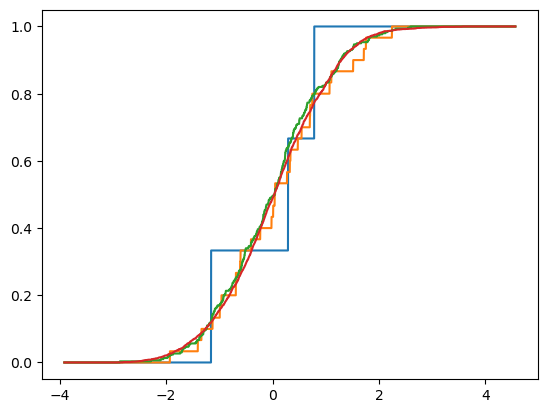

In [68]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:

    grid = np.linspace(x.min()-x.std(), x.max()+x.std(), 3000) # Create a grid
    ecdf = 0*grid.copy() # Create a space for values

    def indicate(X,grid): 
        ''' Indicator function for computing ECDFs. '''
        return X <= grid

    for i in range(len(X)):
        F_i = indicate(X[i],grid)
        ecdf += F_i

    ecdf = ecdf/len(X)
    sns.lineplot(x=grid, y=ecdf)


- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

ANSWER: As $N$ increases, the ECDF looks smoother. This is because there are more values to compare and average out, making the 'steps' are smaller.

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

<Axes: >

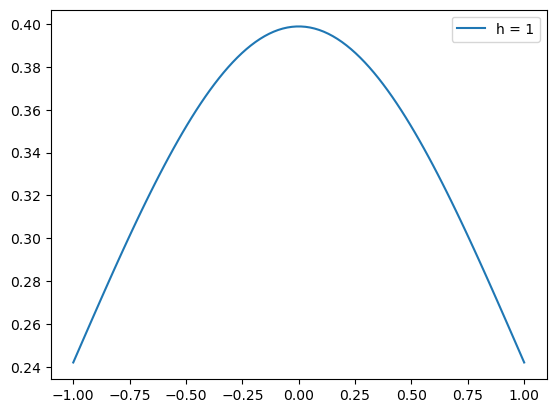

In [ ]:
# Write a function that takes the bandwidth h as given, and computes and plots the kernels listed in the slides
# Normal Kernel

M = 100 # steps for grid
grid = np.linspace(-1,1,M)

def normal_kernel(center,bandwidth):
    density = np.exp( -(( (grid-center)/bandwidth)**2)/2 ) / (bandwidth * np.sqrt(2*np.pi))
    return density

y = normal_kernel(0,1)
sns.lineplot(x=grid,y=y, label=f'h = 1')

<Axes: >

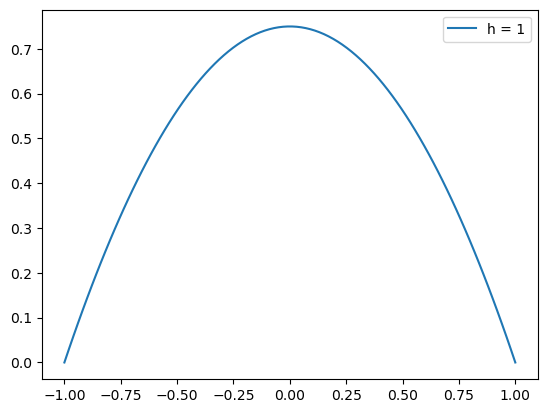

In [ ]:
# Epanechnikov Kernel

M = 100 # steps for grid
grid = np.linspace(-1,1,M)

def epanechnikov_kernel(bandwidth_h):
    density = (3/4) * (1 - bandwidth_h**2)
    return density

y = epanechnikov_kernel(grid/1)
sns.lineplot(x=grid,y=y, label=f'h = 1')

<Axes: >

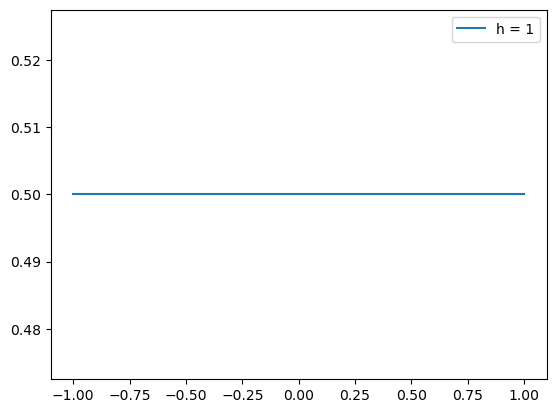

In [ ]:
# Uniform kernel

M = 100 # steps for grid
grid = np.linspace(-1,1,M)

def uniform_kernel(bandwidth_h):
    density = (1/2)
    return density

y = uniform_kernel(grid/1)
sns.lineplot(x=grid,y=y, label=f'h = 1')

<Axes: >

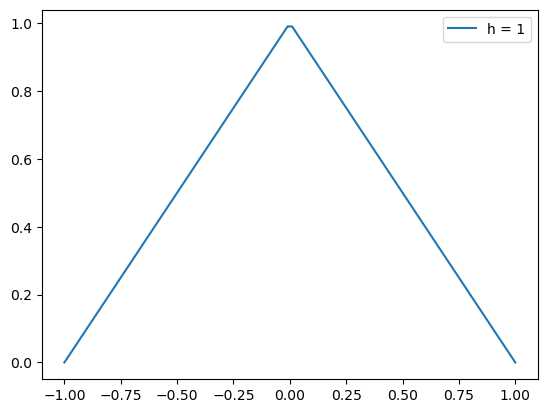

In [ ]:
# Triangular Kernel

M = 100 # steps for grid
grid = np.linspace(-1,1,M)

def triangular_kernel(bandwidth_h):
    density = 1 - np.abs(bandwidth_h)
    return density

y = triangular_kernel(grid/1)
sns.lineplot(x=grid,y=y, label=f'h = 1')

In [ ]:
# Write a function that computes the plug-in bandwidth
# Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
cancer_df = pd.read_csv('data/metabric.csv')

x = cancer_df['Age at Diagnosis']
y = df['Bottles Sold']

def kde(x, plot = True):
    Z = np.sort(x.unique()).reshape(1,-1) # Extract unique values for x
    data = x.to_numpy().reshape(-1,1) # Reshape the data

    #h_s = 1.06 * np.std(x) * len(x)**(-0.2)
    iqr = np.quantile(x,.75) - np.quantile(x,.25)
    h_s = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
    print(f'Bandwidth is: {h_s}')

kde(x)
kde(y)

Bandwidth is: 2.7623750151352238
Bandwidth is: 0.5503112041137632


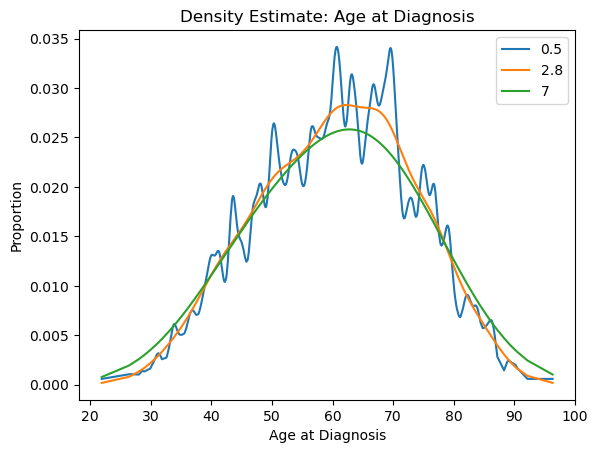

In [ ]:
# Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value.
def kde(x,h, plot = True):
    Z = np.sort(x.unique()).reshape(1,-1) # Extract unique values for x
    data = x.to_numpy().reshape(-1,1) # Reshape the data

    I = np.exp( -(data-Z)**2/(2*h**2) )/( np.sqrt(2*np.pi) * h) # Compute the kernel
    kde = np.mean(I,axis=0) # Sum over x indices and normalize
    grid = Z.reshape(-1,1)

    if plot:
        # Plot KDE
        title_str = x.name
        plt.plot(grid,kde, label = f'{h}')
        plt.title(f'Density Estimate: {title_str}')
        plt.ylabel('Proportion')
        plt.xlabel(title_str)

    return kde, grid

h_grid = [.5, 2.8, 7]
for h in h_grid:
    f_hat, grid = kde(x,h)

plt.legend() # Add legend
plt.show() # Render plot

- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

ANSWER:
The plug-in value for Age at Diagnosis is around 2.76. When I set the bandwidth less than the plug-in value (0.5), the KDE appears to be overfitting, it's trying to follow the data points too exactly and creates a noisy line that makes it hard to interpret the data visually. When I use a bandwidth that is higher (7), it stops following the actual shape of the data and instead follows the general shape of a normal distribution (too much information/nuance is lost).